# Coursework 1: Image filtering

In this coursework you will practice techniques for image filtering. The coursework includes coding questions and written questions. Please read both the text and the code in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Save and Export Notebook As...) the notebook as a PDF file, which contains your code, results and answers, and upload the PDF file onto [Scientia](https://scientia.doc.ic.ac.uk).

* Instead of clicking the Export button, you can also run the following command instead: `jupyter nbconvert coursework_01_solution.ipynb --to pdf`

* If Jupyter complains about some problems in exporting, it is likely that pandoc (https://pandoc.org/installing.html) or latex is not installed, or their paths have not been included. You can install the relevant libraries and retry. Alternatively, use the Print function of your browser to export the PDF file.

* If Jupyter-lab does not work for you at the end (we hope not), you can use Google Colab to write the code and export the PDF file.

## Dependencies:

You need to install Jupyter-Lab (https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) and other libraries used in this coursework, such as by running the command:
`pip3 install [package_name]`


In [1]:
# Import libaries (provided)
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter (20 points).

Read the provided input image, add noise to the image and design a moving average filter for denoising.

You are expected to design the kernel of the filter and then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

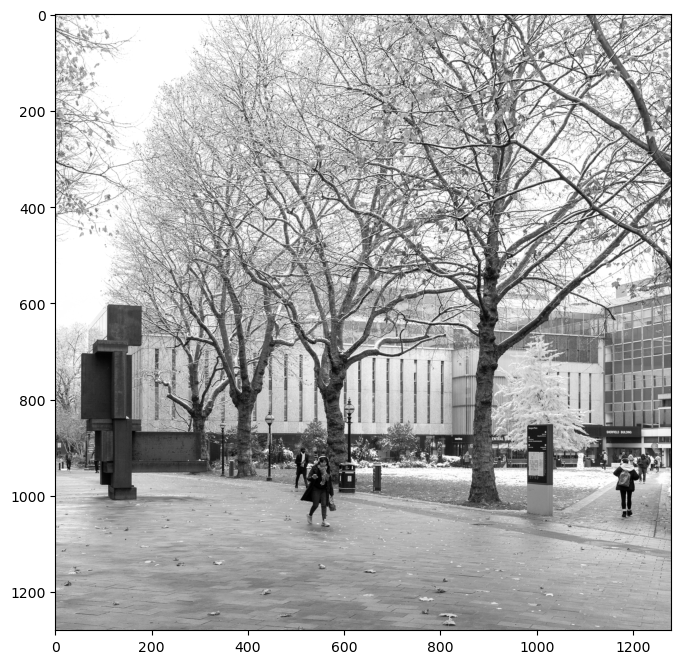

In [2]:
# Read the image (provided)
image = imageio.imread('campus_snow.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(8, 8)

(1280, 1280)


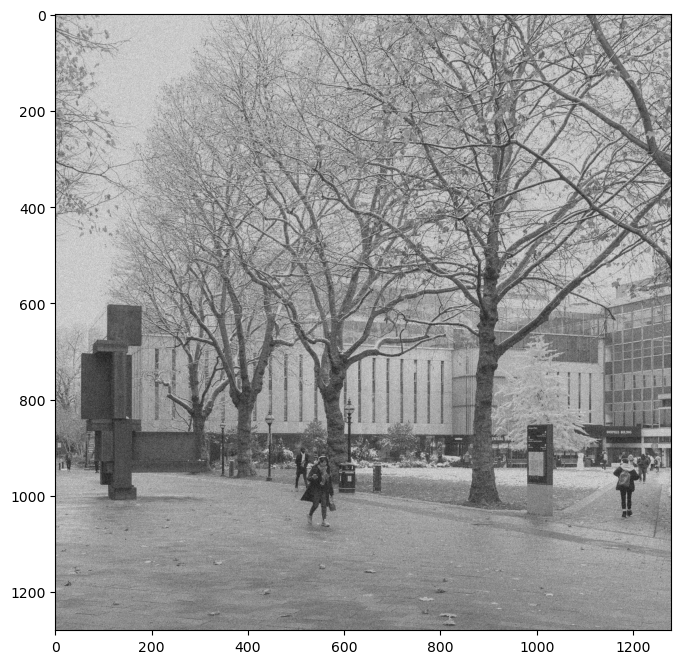

In [3]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
print(image_noisy.shape)
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results.

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
(1280, 1280)


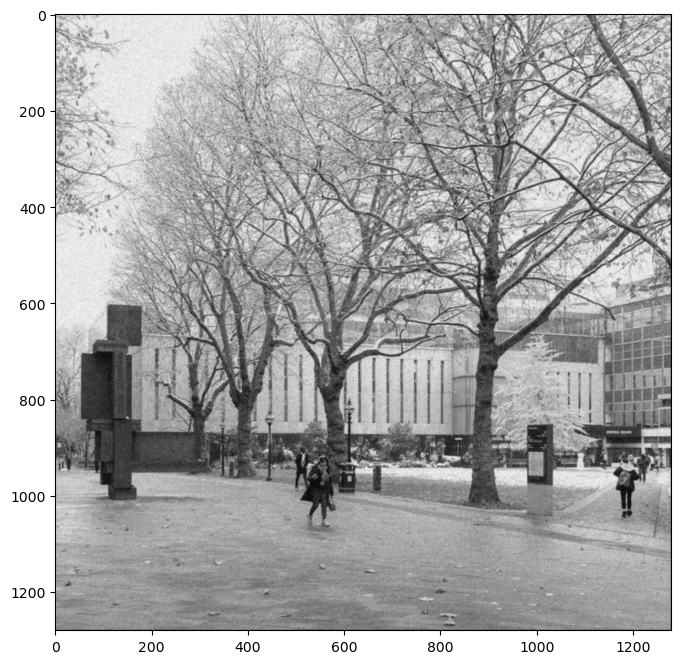

In [4]:
# Design the filter h
### Insert your code ###
h = np.array([[1 / 9 for i in range(3)] for i in range(3)])

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode="same")

# Print the filter (provided)
print('Filter h:')
print(h)
print(image_filtered.shape)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter.

Filter h:
[[0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]
 [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
  0.09090909 0.09090909 0.09090909 0.090

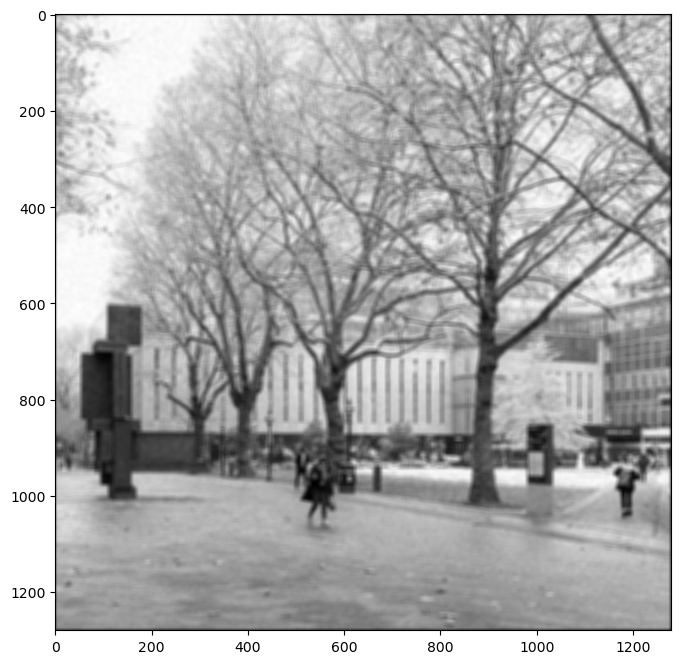

In [5]:
# Design the filter h
### Insert your code ###
h = np.array([[1/11 for i in range(11)] for i in range(11)])

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode="same")

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results?

Larger kernel size reduces the noise more effectively, but in the cost of lost details, making the result more blury.


## 2. Edge detection (56 points).

Perform edge detection using Sobel filtering, as well as Gaussian + Sobel filtering.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image.

sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


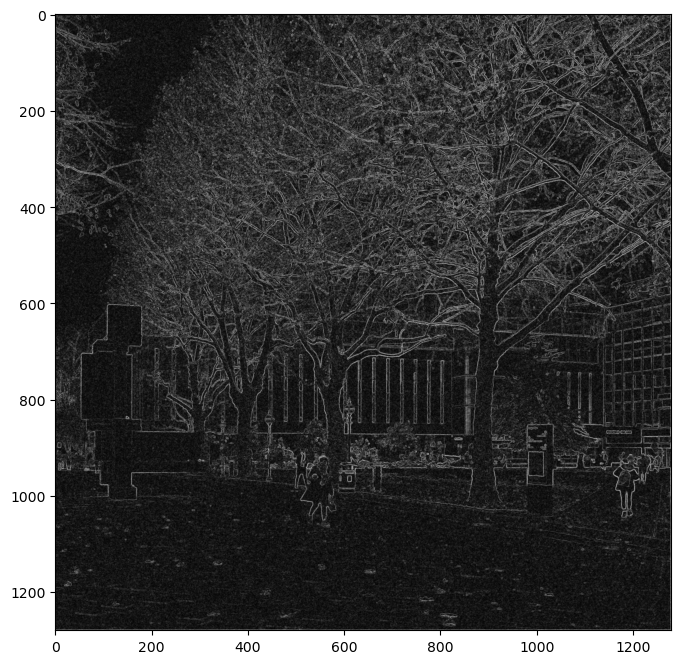

In [10]:
# Design the filters
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
sobel_y = sobel_x.T

# Image filtering
filtered_x = scipy.signal.convolve2d(image_noisy, sobel_x, mode="same")
filtered_y = scipy.signal.convolve2d(image_noisy, sobel_y, mode="same")

# Calculate the gradient magnitude
grad_mag = np.sqrt(filtered_x ** 2 + filtered_y ** 2)
# Print the filters (provided)
print('sobel_x:')
print(sobel_x)
print('sobel_y:')
print(sobel_y)

# Display the magnitude map (provided)
plt.imshow(grad_mag, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$.

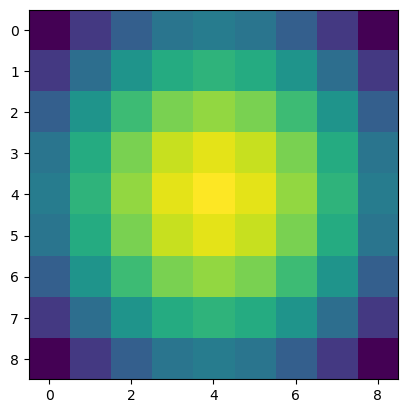

In [11]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel

    x, y = np.meshgrid(np.arange(-4, 5), np.arange(-4, 5))  # Using 21x21 Gaussian filter
    h = np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)
    return h

# Visualise the Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 5 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering and show the gradient magintude map.

Computation time: 0.20715600000000123


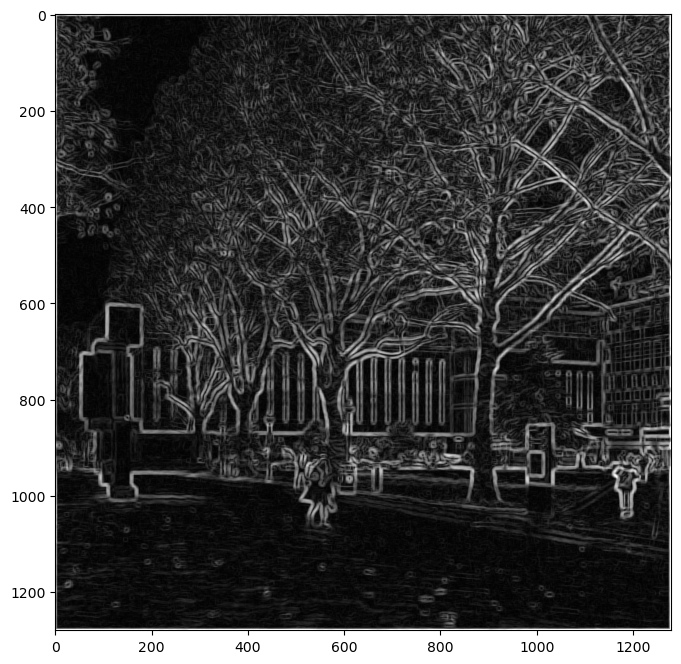

In [12]:
# Construct the Gaussian filter
h = gaussian_filter_2d(5)

# Perform Gaussian smoothing and count time
start_time = time.process_time()
image_smoothed = scipy.signal.convolve2d(image_noisy, h, mode='same')
end_time = time.process_time()
print("Computation time:", end_time - start_time)

# Image filtering
filtered_x = scipy.signal.convolve2d(image_smoothed, sobel_x, mode="same")
filtered_y = scipy.signal.convolve2d(image_smoothed, sobel_y, mode="same")

# Calculate the gradient magnitude
grad_mag = np.sqrt(filtered_x ** 2 + filtered_y ** 2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

### 2.4 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively.

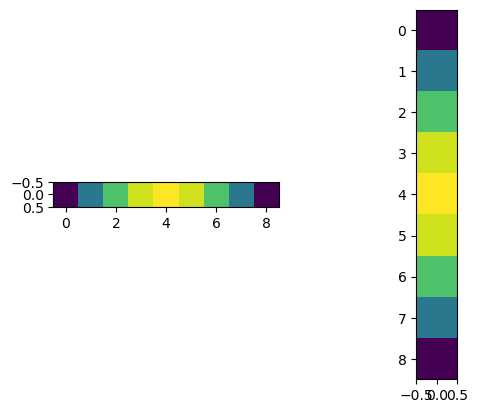

In [13]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel

    x = np.arange(-4, 5)
    h = np.exp(-(x**2) / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)
    return h

# sigma = 5 pixel (provided)
sigma = 5

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_1d = gaussian_filter_1d(sigma)
h_x = h_1d.reshape(1, -1)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = h_x.T

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.6 Perform Gaussian smoothing ($\sigma$ = 5 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering, show the gradient magnitude map and check whether it is the same as the previous one without separable filtering.

Computation time: 0.11529400000000045
Mean difference: -4.2221513712620464e-15


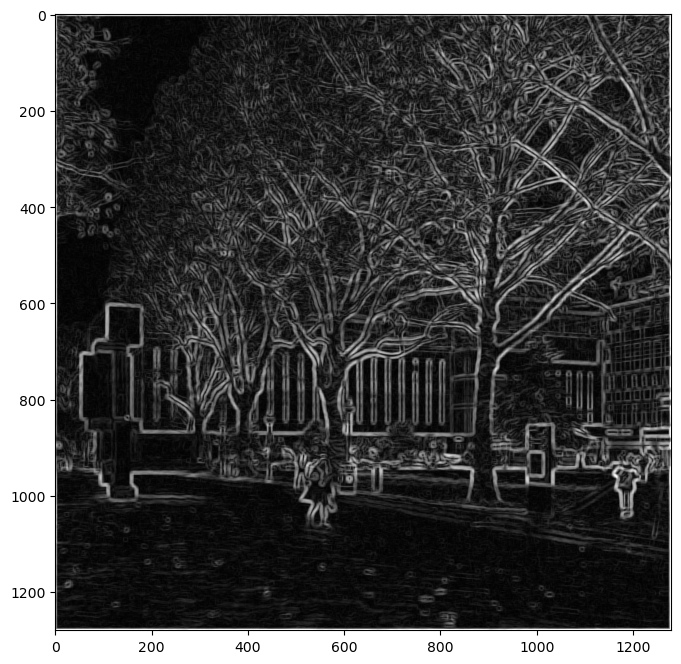

In [14]:
# Perform separable Gaussian smoothing and count time
start_time = time.process_time()
smoothed_x = scipy.signal.convolve2d(image_noisy, h_x, mode='same')
image_smoothed = scipy.signal.convolve2d(smoothed_x, h_y, mode='same')
end_time = time.process_time()
print("Computation time:", end_time - start_time)

# Image filtering
filtered_x = scipy.signal.convolve2d(image_smoothed, sobel_x, mode="same")
filtered_y = scipy.signal.convolve2d(image_smoothed, sobel_y, mode="same")

# Calculate the gradient magnitude
grad_mag2 = np.sqrt(filtered_x ** 2 + filtered_y ** 2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag2, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.
mean_diff = (grad_mag - grad_mag2).sum() / grad_mag.size
print("Mean difference:", mean_diff)

### 2.7 Comment on the Gaussian + Sobel filtering results and the computational time.

Gaussian + Sobel filtering prduces clearer edges than Sobel filtering alone due to the smoothing and noise reduction buy the gaussian filter. Using two separable gaussian filter is much faster than using one whole gaussian filter. WHhn using a n*n gaussian filter on a M*N image, n^2 multiplications need to be done for each pixel, in total M*N*n^2 multiplications, that is O(M*N*n^2). When using two separable gaussian filters, for each separable filter, n multiplications need to be done for each pixel, two filters in total 2*M*N*n multiplications, that is O(M*N*n). Theoretically, using larger gaussian filter produces larger process time difference between one whole gaussian filter and two separable gaussian filters. The minor difference between the results of one whole gaussian filter and two separable gaussian filters might be due to the floating-point arithmetic mechanism of python. In theory they should produce the same result.

## 3. Challenge: Implement 2D image filters using Pytorch (24 points).

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [11]:
# Import libaries (provided)
import torch

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor.

In [12]:
# Expand the dimension of the numpy array
image_noisy_expanded = image_noisy.reshape(1, 1, *image_noisy.shape)

# Convert to a Pytorch tensor using torch.from_numpy
t = torch.from_numpy(image_noisy_expanded)

### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter and perform filtering.

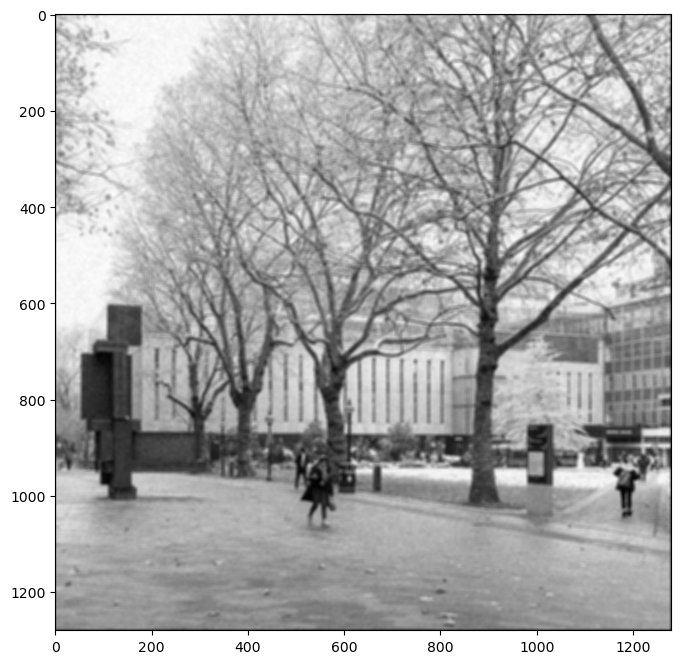

In [13]:
# A 2D Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
h_expanded = h.reshape(1, 1, *h.shape)

# Create the Conv2D filter
filter = torch.nn.Conv2d(1, 1, 9, padding=4, bias=False)
filter.weight.data = torch.from_numpy(h_expanded)

# Filtering
image_noisy_expanded = image_noisy.reshape(1, 1, *image_noisy.shape)
image_filtered = filter(torch.from_numpy(image_noisy_expanded)).detach().cpu().numpy().reshape(*image_noisy.shape)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(8, 8)

### 3.3 Implement Pytorch Conv2D filters to perform Sobel filtering on Gaussian smoothed images, show the gradient magnitude map.

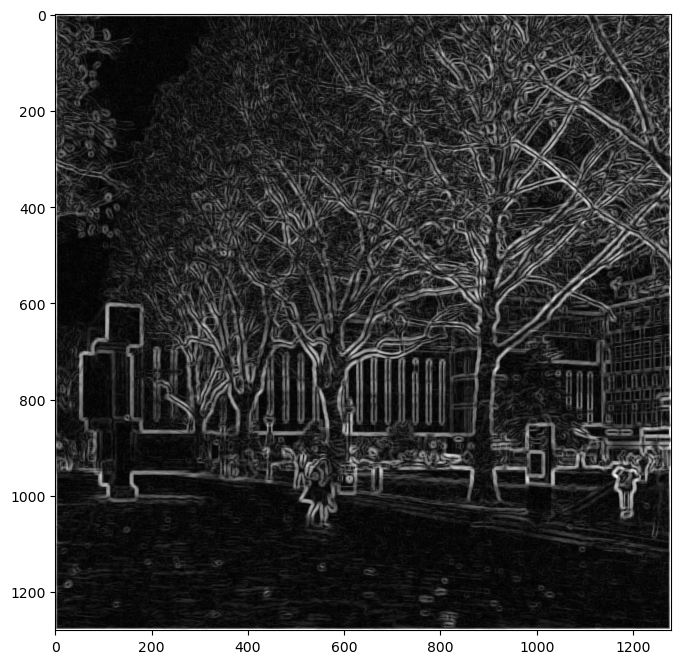

In [14]:
# Create Conv2D filters
sobel_x_expanded = sobel_x.reshape(1, 1, *sobel_x.shape).astype(np.float32)
sobel_y_expanded = sobel_y.reshape(1, 1, *sobel_y.shape).astype(np.float32)
sobel_filter_x = torch.nn.Conv2d(1, 1, 3, padding=1, bias=False)
sobel_filter_y = torch.nn.Conv2d(1, 1, 3, padding=1, bias=False)
sobel_filter_x.weight.data = torch.from_numpy(sobel_x_expanded)
sobel_filter_y.weight.data = torch.from_numpy(sobel_y_expanded)

# Perform filtering
image_filtered_expanded = torch.from_numpy(image_filtered.reshape(1, 1, *image_filtered.shape)).float()
image_sobel_x = sobel_filter_x(image_filtered_expanded).detach().cpu().numpy().reshape(*image_filtered.shape)
image_sobel_y = sobel_filter_y(image_filtered_expanded).detach().cpu().numpy().reshape(*image_filtered.shape)

# Calculate the gradient magnitude map
grad_mag3 = np.sqrt(image_sobel_x ** 2 + image_sobel_y ** 2)

# Visualise the gradient magnitude map (provided)
plt.imshow(grad_mag3, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)